<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/main/12_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! rm Colegio_Invisible -r

In [285]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git

fatal: destination path 'Colegio_Invisible' already exists and is not an empty directory.


for an image...there are pixels

each pixel has 3,4 values (Red Green Blue and sometime Alpha)

those numbers are...1 byte...0 to 255

In [422]:
from PIL import Image
import numpy as np

what can we put into blockchain...
Op_Return
80 bytes and we will use 64 bytes for image data

each byte is made up of 8 binary values 1/0 called bits

64 bytes = 64*8...512 bits

We want to put image in single block

PROPOSAL:

16x16 image = 256 pixels

only get to use 2 bits per pixel

- 0,0  0 
- 0,1  64
- 1,0  128
- 1,1  192

1 byte [ , , , , , , , ]

1 byte can tell us color of 4 pixels
each one taking up 2 bits

In [287]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  colegio_invisible.jpeg  rum_1.jpeg
asymmetric.png		       hg_cry.jpeg	       rum_2.jpeg
bab_crop.jpeg		       hg_drop.jpeg	       rum_3.jpeg
barb_1.jpeg		       hg_hide.jpeg	       rum_4.jpeg
barb_2.jpeg		       hg_house.jpeg	       rum_5.jpeg
barb_3.jpeg		       hg_invite.jpeg	       rum_6.jpeg
barb_4.jpeg		       hg_rough.png	       rum_7.jpeg
barb_5.jpeg		       hg_xmas.jpeg	       rump_final.jpeg
barb_6.jpeg		       mask.png		       signature.png
barb_7.jpeg		       prv_pub_addr.png        stego.png
cat.png			       PubKeyToAddr.png        symmetric.png
clavis.jpeg		       rum_0.jpeg	       zomnd.png


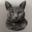

In [288]:
stego_image=Image.open('Colegio_Invisible/img/cat.png')
stego_image=stego_image.resize((32,32))
stego_image

In [289]:
type(stego_image)

PIL.Image.Image

In [290]:
stego_array = np.array(stego_image)
stego_array

array([[[226, 223, 218, 255],
        [224, 220, 215, 255],
        [221, 218, 212, 255],
        ...,
        [204, 198, 192, 255],
        [201, 196, 189, 255],
        [200, 194, 188, 255]],

       [[219, 216, 210, 255],
        [217, 214, 208, 255],
        [214, 211, 205, 255],
        ...,
        [202, 197, 190, 255],
        [200, 195, 188, 255],
        [198, 193, 186, 255]],

       [[209, 206, 199, 255],
        [207, 204, 197, 255],
        [205, 201, 195, 255],
        ...,
        [200, 194, 187, 255],
        [199, 193, 186, 255],
        [197, 191, 185, 255]],

       ...,

       [[135, 127, 120, 255],
        [133, 125, 118, 255],
        [130, 122, 116, 255],
        ...,
        [162, 154, 146, 255],
        [162, 155, 147, 255],
        [163, 156, 148, 255]],

       [[134, 126, 120, 255],
        [132, 124, 118, 255],
        [129, 122, 115, 255],
        ...,
        [161, 153, 145, 255],
        [162, 154, 146, 255],
        [162, 155, 147, 255]],

       [[133

**`uint8`** stands for unsigned 8-bit integer
- 8 binary 1/0 values
- that is one byte
- a number from 0-255
- two hex values like ff

In [291]:
2**8

256

In [292]:
stego_array.dtype

dtype('uint8')

In [293]:
stego_array.shape

(32, 32, 4)

In [294]:
stego_array[:,:,:3]

array([[[226, 223, 218],
        [224, 220, 215],
        [221, 218, 212],
        ...,
        [204, 198, 192],
        [201, 196, 189],
        [200, 194, 188]],

       [[219, 216, 210],
        [217, 214, 208],
        [214, 211, 205],
        ...,
        [202, 197, 190],
        [200, 195, 188],
        [198, 193, 186]],

       [[209, 206, 199],
        [207, 204, 197],
        [205, 201, 195],
        ...,
        [200, 194, 187],
        [199, 193, 186],
        [197, 191, 185]],

       ...,

       [[135, 127, 120],
        [133, 125, 118],
        [130, 122, 116],
        ...,
        [162, 154, 146],
        [162, 155, 147],
        [163, 156, 148]],

       [[134, 126, 120],
        [132, 124, 118],
        [129, 122, 115],
        ...,
        [161, 153, 145],
        [162, 154, 146],
        [162, 155, 147]],

       [[133, 126, 119],
        [131, 124, 117],
        [129, 122, 115],
        ...,
        [160, 152, 144],
        [161, 153, 145],
        [163, 155, 147]]

In [295]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

In [296]:
stego_array_grey=stego_array[:,:,:3].mean(axis=2).astype('uint8')
stego_array_grey.shape,stego_array_grey.dtype

((32, 32), dtype('uint8'))

In [297]:
stego_array_grey

array([[222, 219, 217, ..., 198, 195, 194],
       [215, 213, 210, ..., 196, 194, 192],
       [204, 202, 200, ..., 193, 192, 191],
       ...,
       [127, 125, 122, ..., 154, 154, 155],
       [126, 124, 122, ..., 153, 154, 154],
       [126, 124, 122, ..., 152, 153, 155]], dtype=uint8)

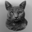

In [298]:
stego_image_grey = Image.fromarray(stego_array_grey)
stego_image_grey

In [299]:
def int_2_bit_array(num):
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(8-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

In [300]:
int_2_bit_array(255)

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [301]:
int_2_bit_array(2)

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [302]:
int_2_bit_array(64)

array([0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [303]:
int_2_bit_array(65)

array([0, 1, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [304]:
int_2_bit_array(68)

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [305]:
int_2_bit_array(1)

array([0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [306]:
int_2_bit_array(0)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Goal:

- take image of 256 bytes and reduce each byte to 2 bit in form of 2 element array
- turn that all into 512 bits
- turn 512 bits into 64 bytes

# Generalize Standard For Images (MxN)

If we create a standard for the header that describes the data stored then we can choose the following paramenters:

- length
- width
- color dim 
- color bit count

In total the number of bits is the product of all the parameters

## Greyscale Image 

## RGB Image

## Two Channel Color Standard

## Four Channel

## General Color Dim



In [308]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

def message_2_bit_array(message,mode=None):
    '''This function takes in a message as string, bytestring or hextring.
    If hexstring input the set mode='hex' '''
    if type(message)==bytes:
        hex_str=message.hex()
    elif (type(message)==str):
        if mode not in ('hex','hexstring'):
            hex_str=message.encode().hex()
        else:
            hex_str=message
    else:
        print('fix the input and mode')
        return None
    
    num=int('0x'+hex_str,base=16)
    byte_len=(len(hex_str)+1)//2
    bit_len=byte_len*8
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(bit_len-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

def bit_array_2_byte_str(bit_array):
    '''Convert bit array to a bytestring'''
    bit_list=[ str(bit) for bit in bit_array]
    bin_str='0b'+(''.join(bit_list))
    num=int(bin_str,base=2)
    return num.to_bytes(len(bit_array)//8,'big')

def bit_array_2_hex_str(bit_array):  
    '''Convert a bit array to a hexstring'''
    return bit_array_2_byte_str(bit_array).hex()

def bit_array_2_str(bit_array,encoding='utf-8'):
    '''Convert a bit array to a string'''
    return bit_array_2_byte_str(bit_array).decode(encoding)

def int2bitarray(x,bit=8):
  return message_2_bit_array(hex(x)[2:],mode='hex')[:bit]

def bitarray2int(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return (b_arr*scales).sum()

def imgarr2bitarray(imgarr,bit=8):
  return np.array([ int2bitarray(it,bit) for it in imgarr.reshape(-1)]).reshape(-1)

def bitarray2imgarr(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr
 
def bitarray2imgarr_scale(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int_scale(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr

In [309]:
class bitimage():

  def __init__(self,imgpath,dims=(16,16),bit=2,color=1):
    from PIL import Image
    self.color=color
    self.bit=bit
    self.dims=list(dims)
    self.img_og=Image.open(imgpath)
    self.img_resize=self.img_og.resize(dims)
    self.grey=grey_imgarr(np.array(self.img_resize))
    self.img_grey=Image.fromarray(self.grey)
    self.bitarray=imgarr2bitarray(self.grey,bit)
    self.bitarray_color=imgarr2bitarray(np.array(self.img_resize)[:,:,:color],bit)
    self.newimg=Image.fromarray(bitarray2imgarr(self.bitarray,imgshape=dims,bit=bit,color=1).squeeze())
    self.newimg_color=Image.fromarray(bitarray2imgarr(self.bitarray_color,imgshape=dims,bit=bit,color=3).squeeze())
    self.bytestring=bit_array_2_byte_str(self.bitarray)
    self.bytestring_color=bit_array_2_byte_str(self.bitarray_color)




In [310]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  colegio_invisible.jpeg  rum_1.jpeg
asymmetric.png		       hg_cry.jpeg	       rum_2.jpeg
bab_crop.jpeg		       hg_drop.jpeg	       rum_3.jpeg
barb_1.jpeg		       hg_hide.jpeg	       rum_4.jpeg
barb_2.jpeg		       hg_house.jpeg	       rum_5.jpeg
barb_3.jpeg		       hg_invite.jpeg	       rum_6.jpeg
barb_4.jpeg		       hg_rough.png	       rum_7.jpeg
barb_5.jpeg		       hg_xmas.jpeg	       rump_final.jpeg
barb_6.jpeg		       mask.png		       signature.png
barb_7.jpeg		       prv_pub_addr.png        stego.png
cat.png			       PubKeyToAddr.png        symmetric.png
clavis.jpeg		       rum_0.jpeg	       zomnd.png


# Transform Image and Create Byte Encoding 

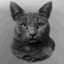

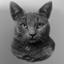

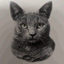

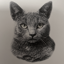

(32, 96)

In [311]:
bimg=bitimage('Colegio_Invisible/img/cat.png',dims=(64,64),bit=5,color=3)
display(bimg.newimg)
display(bimg.img_grey)
display(bimg.newimg_color)
display(bimg.img_resize)
len(bimg.bytestring)//80,len(bimg.bytestring_color)//80

# Create Embedding for Blockchain

In [312]:
import hashlib 

message=bimg.bytestring
H=hashlib.sha256(message)

n=80
chunks = [message[i:i+n] for i in range(0, len(message), n)]

print(len(chunks))
print(len(chunks[-1]))

print(H.digest())

32
80
b'\xd1\x9c\x04\xdab\x05\x01X@]\xc1\xc1\xe7@\x9d\xd2\xe85aAl\xe0P\xbf\x91\xeb\xb7w\xb3\xa5P\x13'


In [345]:
header=b'\xc1\xdd\x00\x01\x03\xff\x00\x00\x40\x00\x40\x05'
text='Sparkle🐈‍⬛MagicalCat🐈‍⬛✨💜Fovever💜✨'.encode()
print(len(header))
print(len(text))
header+text

12
58


b'\xc1\xdd\x00\x01\x03\xff\x00\x00@\x00@\x05Sparkle\xf0\x9f\x90\x88\xe2\x80\x8d\xe2\xac\x9bMagicalCat\xf0\x9f\x90\x88\xe2\x80\x8d\xe2\xac\x9b\xe2\x9c\xa8\xf0\x9f\x92\x9cFovever\xf0\x9f\x92\x9c\xe2\x9c\xa8'

In [346]:
package=[header+text]+chunks
package

[b'\xc1\xdd\x00\x01\x03\xff\x00\x00@\x00@\x05Sparkle\xf0\x9f\x90\x88\xe2\x80\x8d\xe2\xac\x9bMagicalCat\xf0\x9f\x90\x88\xe2\x80\x8d\xe2\xac\x9b\xe2\x9c\xa8\xf0\x9f\x92\x9cFovever\xf0\x9f\x92\x9c\xe2\x9c\xa8',
 b'\xe6\xf7\xbd\xef{\xde\xf7\xad\xefZ\xd6\xb5\xadkZ\xd6\xb5\xadkZ\xd6\xb5\xadkZ\xd6\xb5\xadg9\xd6s\x9c\xe79\xce1\x8cc\x18\xde\xf7\xbd\xebZ\xd6\xb1Z\xe3Z\xd6\xb5\xadkZ\xd6\xb5\xadkZ\xd6\xb5\xadkZ\xces\x9c\xe7Y\xc4\xe3,g9\xc61\x8cc\x18',
 b"\xde\xf5\xadkZ\xd6'\x08Bw\xd6s\x9c\xe79\xces\x9c\xe79\xces\x9c\xe79\xces\x9c\xe6\xf4\x83Z\xcbg8\xc61\x8cc\x18\xd6\xb5\xadg9\xcd\xe2\xe79\xaf\x9es\x9c\xe79\xces\x9c\xe79\xces\x9c\xe79\xces\x9cI\xccZ\x92\xaa\xe7\x18\xc61\x8cc\x18",
 b'\xd6s\x9c\xe79\xcd\x9e\xc6\xb1\xacdq\x8cc\x18\xc61\x8cc\x19\xces\x9c\xe79\xces\x87\xb1kR\x90\x9a\xe7\x18\xc61\x8cc\x17\xces\x8cc\x18\xc5Z\xb6\xb5\x8bZ\x9f|c\x18\xc61\x8cc\x18\xc61\x8cc\x18\xc6,\xd5\xa9lRP\x9ac\x18\xc61\x8b\xde\xf7',
 b'\xc61\x8b\xde\xf7\xbd\x18\xa61IJ\x12\xeb^\xf7\xbd\xef{\xde\xf7\xbd\xef{\xde\xf7\xc5\

In [329]:
! pip install eciespy eth_keys cryptos qrcode base58 

In [330]:
import pandas as pd
from cryptos.py3specials import safe_hexlify, from_string_to_bytes, from_int_to_byte, from_string_to_bytes
from cryptos import serialize,deserialize

import hashlib
import os
import getpass
import ecies
import eth_keys
import cryptos
import qrcode
import base58
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def import_privKey(privkey_filepath,password=None):
    if password==None:
        password = getpass.getpass("Input password for decrypting keyfile: ")
    password=password.encode()
    f=open(privkey_filepath,'rb')
    decrypted_bytes=ecies.aes_decrypt(key=hashlib.sha256(password).digest(),cipher_text=f.read())
    privKey=eth_keys.keys.PrivateKey(decrypted_bytes)
    return privKey

def import_pubKey(pubkey_filepath):
    f=open(pubkey_filepath,'rb')
    privKey=eth_keys.keys.PublicKey(f.read())
    return privKey

def import_addr(addr_filepath):
    return open(addr_filepath,'rb').read().decode()

def only_conf(utxos):
    return [utxo for utxo in utxos
            if doge.fetchtx(utxo['output'].split(':')[0])['confirmations']>0]

def mk_opreturn(msg, rawtx=None, json=0):
    
    def op_push(data):
        if type(data) == bytes:
            bytedata=data
        else:
            bytedata=data.encode()
        import struct
        if len(data) < 0x4c:
            return from_int_to_byte(len(bytedata)) + bytedata
        elif len(data) < 0xff:
            return from_int_to_byte(76) + struct.pack('<B', len(bytedata)) + bytedata
        elif len(data) < 0xffff:
            return from_int_to_byte(77) + struct.pack('<H', len(bytedata)) + bytedata
        elif len(data) < 0xffffffff:
            return from_int_to_byte(78) + struct.pack('<I', len(bytedata)) + bytedata
        else: raise Exception("Input data error. Rawtx must be hex chars" \
                            + "0xffffffff > len(data) > 0")

    orhex = safe_hexlify(b'\x6a' + op_push(msg))
    orjson = {'script' : orhex, 'value' : 0}
    if rawtx is not None:
        try:
            txo = deserialize(rawtx)
            if not 'outs' in txo.keys(): raise Exception("OP_Return cannot be the sole output!")
            txo['outs'].append(orjson)
            newrawtx = serialize(txo)
            return newrawtx
        except Exception as E:
            print(E)
            print(type(E))
            raise Exception("Raw Tx Error!")
    return orhex if not json else orjson

# Load Keys and Addresses

In [331]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [332]:
! cp drive/MyDrive/cinv/llaves.zip llaves.zip 
! unzip llaves.zip

Archive:  llaves.zip
replace llaves/mi_addr.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: llaves/mi_addr.bin      
 extracting: llaves/mi_addr.png      
 extracting: llaves/mi_pub.bin       
 extracting: llaves/mi_prv.enc       


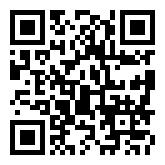

'0x7c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5'

'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX'

In [334]:
from IPython.display import Image
qr=Image('llaves/mi_addr.png')

privKey=import_privKey('llaves/mi_prv.enc','')
pub=import_pubKey('llaves/mi_pub.bin').to_hex()
addr=import_addr('llaves/mi_addr.bin')

display(qr)
display(pub)
display(addr)

# Inspect Outputs

In [336]:
doge=cryptos.Doge()
#addy=doge.privtoaddr(privkeyhex)
doge_unspents=only_conf( doge.unspent(addr) )
doge_unspent_total=sum([unspent['value'] for unspent in doge_unspents])
doge_unspent_total/10**8

227.99999975

# Create UTXO set for Enscription

In [350]:
tip=12_00_000_000
available=doge_unspent_total-tip
n=len(package)
gift=int(available/n)
outputs=[{'value':gift , 'address': addr} for i in range(33)]
setup_tx=doge.mktx(doge_unspents,outputs)

In [351]:
doge.signall(setup_tx,privKey.to_hex()[2:])

'0100000022750cbd9a3bee09ef5a86f40ff6ab8c7a1e210a843b8487c889f9e5a3ef937ab0000000008a47304402202d845ca9e40bf1465cf3d20590e6f22e97417b3c79e984e346b2e920c5844fcf02205a993b3ba8327bf312f7b60f06984e6a1abe162c366df711693e67f46a74c4d70141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5fffffffffe1238af37298a469c20621f8e7901a47091f6272e71e741215c7e336fd44603000000008b483045022100d737588adf220f0b8f41e61d59d3105fdc8f10d9f50ec0098ce8d197c1cba0a502205ad8979c6296933f2fc08897864b8fc6589ad306f050d45ce1202a447ee709680141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5ffffffffeb7b2be11bfe2fdc1789277792aceacf1b4bb8cbc42b8700d2dc14c0533e0392000000008a473044022015b42a91ac1968c43ab05e63f3c6e08dd87ecc4e9dfacd30647c6adb3b2482f702205c53084b5810dc31288411ea686629aac7e25523baca963045edd84efda697f30141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b25

In [352]:
tip/(len(cryptos.serialize(setup_tx))/2)/100000

1.658833287254631

In [353]:
funding=doge.pushtx(cryptos.serialize(setup_tx))
funding

{'data': {'network': 'DOGE',
  'txid': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b'},
 'status': 'success'}

In [356]:
doge.fetchtx(funding['data']['txid'])

{'blockhash': '773859d5550e8ab3a28abb1de82712577c73a467c4274b8139a770b4b139c85d',
 'confirmations': 1,
 'inputs': [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': 'b07a93efa3e5f989c887843b840a211e7a8cabf60ff4865aef09ee3b9abd0c75'},
   'input_no': 0,
   'script': '304402202d845ca9e40bf1465cf3d20590e6f22e97417b3c79e984e346b2e920c5844fcf02205a993b3ba8327bf312f7b60f06984e6a1abe162c366df711693e67f46a74c4d701 047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5',
   'sequence': 4294967295,
   'type': 'pubkeyhash',
   'value': '2.75757575',
   'witness': None},
  {'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX',
   'from_output': {'output_no': 0,
    'txid': '0346d46f337e5c2141e7712e27f69170a401798e1f62209c468a2937af3812fe'},
   'input_no': 1,
   'script': '3045022100d737588adf220f0b8f41e61d59d3105fdc8f10d9f50ec0098ce8d197c1cba0a502205ad8979c6296933f2fc08897864b8fc658

In [357]:
#UTXO set
sparkle_unspents=only_conf( doge.unspent(addr) )
sparkle_unspents

[{'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:0',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:1',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:2',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:3',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:4',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:5',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:6',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:7',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b:8',
  'value': 654545453},
 {'output': 'c1542c10399a09a5471799133c472a6652d5cb3b7b

In [362]:
input_monolists=[ [elem] for elem in sparkle_unspents]

# Send 33 UTXOS from same txn back to self

# Create list of transactions each containing op_return

In [363]:
write_tip=1_37_000_000
outputs=[ [{'value':elem['value']-write_tip , 'address': addr}] for elem in sparkle_unspents]

In [364]:
outputs

[[{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX', 'value': 517545453}],
 [{'address': 'D6zKNnkupqRbkB9p5rwix8Q

        doge_serial_tx=cryptos.serialize(doge_tx)
        doge_inscribed_serial_tx=mk_opreturn( op_return , doge_serial_tx)
        doge_inscribed_tx=cryptos.deserialize(doge_inscribed_serial_tx)
        doge_signed_inscribed_tx=doge.signall(doge_inscribed_tx,privkeyhex)
        broadcast_doge_signed_inscribed_tx=doge.pushtx(doge_signed_inscribed_tx)

In [365]:
txns=[ doge.mktx(input_monolists[i],outputs[i]) for i in range(33)]

In [366]:
serial_txns=[cryptos.serialize(tx) for tx in txns]

In [367]:
inscribed_serial_txs=[mk_opreturn( package[i] , serial_txns[i]) for i in range(33)]

In [368]:
1.37/len(inscribed_serial_txs[0])/2

0.002063253012048193

In [369]:
inscribed_serial_txs

['01000000013b395b9f03e2807e1a1e427b3bcbd552662a473c13991747a5099a39102c54c10000000000ffffffff02ed1dd91e000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000486a46c1dd000103ff000040004005537061726b6c65f09f9088e2808de2ac9b4d61676963616c436174f09f9088e2808de2ac9be29ca8f09f929c466f7665766572f09f929ce29ca800000000',
 '01000000013b395b9f03e2807e1a1e427b3bcbd552662a473c13991747a5099a39102c54c10100000000ffffffff02ed1dd91e000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000536a4c50e6f7bdef7bdef7adef5ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ad6739d6739ce739ce318c6318def7bdeb5ad6b15ae35ad6b5ad6b5ad6b5ad6b5ad6b5ad6b5ace739ce759c4e32c6739c6318c631800000000',
 '01000000013b395b9f03e2807e1a1e427b3bcbd552662a473c13991747a5099a39102c54c10200000000ffffffff02ed1dd91e000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88ac0000000000000000536a4c50def5ad6b5ad627084277d6739ce739ce739ce739ce739ce739ce739ce6f4835acb6738c6318c6318d6b5ad6739cde2e739af9e739ce739ce739c

In [370]:
inscribed_txs=[cryptos.deserialize(elem) for elem in inscribed_serial_txs]

In [371]:
signed_inscribed_txs=[doge.signall(elem,privKey.to_hex()[2:]) for elem in inscribed_txs]

In [372]:
broadcasts=[doge.pushtx(elem) for elem in signed_inscribed_txs]
broadcasts

[{'data': {'network': 'DOGE',
   'txid': '53ae86951b38d91cc01a90e7cf9e7089ffff0a4b81a46fcd02a104d696247cb2'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'c0c0100357741223008b3d543d248b0be2fa2a4ebb17b113729298088951774b'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '2f3162731462b52420ef5954c7d634f0c2a779dae3688795b53d5a9eed15508c'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '9e5cc64874aa80076765b0ab06d6858c4f16b32dbe5c3f504a9695b49cfd953c'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'a23f334f08af6e56fa7553bc204c3b9e04f8c6f0e93f3c9bf300ef0a0ba8e3b1'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '1a5b286ce3e440fade57d07c23484996f70049ddc11123d79875b99aa9dfc914'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': '85981e0d4245c10cdba9c1d869cc0db10505da89bb2936e464a63b5b21e9095b'},
  'status': 'success'},
 {'data': {'network': 'DOGE',
   'txid': 'ebcd6115961bcef1a4ba

# Everything is Retrievable From the TX Hash of Header Transaction 

The first transaction, spending the first output of the prepared UTXOs

```
53ae86951b38d91cc01a90e7cf9e7089ffff0a4b81a46fcd02a104d696247cb2
```

In [2]:
[doge.fetchtx(broadcast['data']['txid'])['confirmations'] for broadcast in broadcasts]

In [ ]:
doge.block_height()

# Automate Reading From Dogecoin Blockchain

In [418]:
def read_image(txn_id):
  img_header_tx_data=doge.fetchtx(txn_id)
  op_return=img_header_tx_data['outputs'][1]['script'][10:]
  utxo_id=img_header_tx_data['inputs'][0]['from_output']['txid']
  blk_height= doge.block_height(txn_id)
  cand_txns=doge.block_info(blk_height)['tx_hashes'][1:]+doge.block_info(blk_height-1)['tx_hashes'][1:]+doge.block_info(blk_height+1)['tx_hashes'][1:]
  cand_txns_info=[(cand,doge.fetchtx(cand)) for cand in cand_txns]
  img_txn_info=[ ( info['inputs'][0]['from_output']['output_no'],info['outputs'][1]['script'][10:] ) for (_,info) in cand_txns_info if info['inputs'][0]['from_output']['txid']==utxo_id]
  img_data_list=sorted(img_txn_info)
  hex_header=img_data_list[0][1]
  img_hex = ''.join([elem[1] for elem in img_data_list[1:]])
  image_bytes=bytes.fromhex(image_hex)
  L=int(hex_header[14:18],16)
  W=int(hex_header[18:22],16)
  B=int(hex_header[22:24],16)
  print(L,W,B)
  print(len(img_data_list))
  sparkle_bits=message_2_bit_array(image_bytes,mode=None)
  spark_array=bitarray2imgarr(sparkle_bits,imgshape=(L,W),bit=B,color=1).squeeze()
  return spark_array
  

In [419]:
sp_ar=read_image('53ae86951b38d91cc01a90e7cf9e7089ffff0a4b81a46fcd02a104d696247cb2')

64 64 5
33


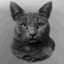

In [424]:
Image.fromarray(sp_ar)